In [1]:
# COMPLETE SETUP:
import sys
import os
import numpy as np

print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")

src_path = os.path.join(os.getcwd(), 'src')
src_path_abs = os.path.abspath(src_path)

waymo_module_path = None
local_src = os.path.abspath(os.path.join(os.getcwd(), 'src', 'waymo_open_dataset'))
if os.path.exists(local_src):
    waymo_module_path = local_src
    src_dir = os.path.abspath(os.path.join(os.getcwd(), 'src'))
    if src_dir not in sys.path:
        sys.path.insert(0, src_dir)   # ensure imports from src work
    print(f"FOUND waymo_open_dataset AT local src: {waymo_module_path}")
else:
    # 2) search existing sys.path entries (original behavior)
    for path in sys.path:
        potential_path = os.path.join(path, 'waymo_open_dataset')
        if os.path.exists(potential_path):
            waymo_module_path = potential_path
            print(f"FOUND waymo_open_dataset IN sys.path AT: {waymo_module_path}.")
            break
if not waymo_module_path:
    print("\twaymo_open_dataset DIRECTORY NOT FOUND IN ANY sys.path LOCATION.")


try:    # Check protobuf version
    import google.protobuf
    protobuf_version = google.protobuf.__version__
    print(f"Protobuf version: {protobuf_version}")
    
    if protobuf_version.startswith('3.20'):
        print("CORRECT protobuf VERSION!")
    else:
        print(f"\tWrong protobuf version ({protobuf_version}), need 3.20.3")
        print("Run this in terminal: conda activate waymo; pip install protobuf==3.20.3 --force-reinstall")
except Exception as e:
    print(f"\tProtobuf ERROR: {e}")


try:    # Test basic imports
    print(f"NumPy version: {np.__version__}")
    
    import tensorflow as tf
    print(f"TensorFlow version: {tf.__version__}")
    print("BASIC IMPORTS SUCCESSFUL.")
except Exception as e:
    print(f"\tBasic imports FAILED: {e}")


try:    # Import Waymo modules
    from waymo_open_dataset import dataset_pb2
    print("dataset_pb2 imported")
    
    from waymo_open_dataset.protos import scenario_pb2
    print("scenario_pb2 imported")
    
    from waymo_open_dataset.utils import womd_camera_utils
    print("womd_camera_utils imported")
    
    # Import additional utility modules for data processing
    from waymo_open_dataset.utils import range_image_utils
    from waymo_open_dataset.utils import transform_utils
    from waymo_open_dataset.utils import frame_utils
    print("Additional utils imported")
    
    print("ALL WAYMO IMPORTS SUCCESSFUL!")
except ImportError as e:
    print(f"\tWaymo import FAILED: {e}")
    print("\nSOLUTIONS:")
    print("1. Make sure you're in the correct directory (waymo-open-dataset/tutorial)")
    print("In /src/waymo_open_dataset you should have libraries (like math, metrics, protos, utils), __pycache__, bazel etc.")
    print("IF NOT: clone the repo: https://github.com/waymo-research/waymo-open-dataset.git")
    print("2. Compile proto files first:")
    print("   - Change to src directory: os.chdir('../src')")
    print("   - Run: subprocess.run(['python', '-m', 'grpc_tools.protoc', '--python_out=.', '--proto_path=.'] + glob.glob('waymo_open_dataset/**/*.proto', recursive=True))")
    print("3. Or run this compilation now:")
    try:    # Try to compile proto files automatically
        import subprocess
        import glob
        current_dir = os.getcwd() # Change to src directory
        src_dir = None
        for potential_src in [os.path.join(current_dir, '..', 'src'),   # Find src directory
                             os.path.join(current_dir, 'src'),
                             r'c:\Users\radov\dev\waymo-open-dataset\src']:
            if os.path.exists(potential_src):
                src_dir = potential_src
                break
        if src_dir:
            print(f"   Found src directory: {src_dir}")
            os.chdir(src_dir)
            # Get proto files
            proto_files = glob.glob('waymo_open_dataset/**/*.proto', recursive=True)
            print(f"   Found {len(proto_files)} proto files")
            if proto_files:
                # Compile proto files
                cmd = ['python', '-m', 'grpc_tools.protoc', '--python_out=.', '--proto_path=.'] + proto_files
                result = subprocess.run(cmd, capture_output=True, text=True)
                
                if result.returncode == 0:
                    print("   Proto FILES COMPILED SUCCESSFULLY!")
                    os.chdir(current_dir)  # Return to original directory
                    print("\tPlease restart the kernel and run this cell again")
                else:
                    print(f"\tProto compilation FAILED: {result.stderr}")
                    os.chdir(current_dir)
            else:
                print("\tNo proto files found")
                os.chdir(current_dir)
        else:
            print("\tCould not find src directory")
    except Exception as compile_error:
        print(f"\tAuto-compilation FAILED: {compile_error}")
except Exception as e:
    print(f"\tUnexpected ERROR: {e}")

camera_names = {1: 'FRONT', 2: 'FRONT_LEFT', 3: 'FRONT_RIGHT', 4: 'SIDE_LEFT', 5: 'SIDE_RIGHT'}
laser_names = {1: 'TOP', 2: 'FRONT', 3: 'SIDE_LEFT', 4: 'SIDE_RIGHT', 5: 'REAR'}
label_types = {1: 'Vehicle', 2: 'Pedestrian', 3: 'Sign', 4: 'Cyclist'}
print("MAPPINGS DEFINED.")

print(f"\nSETUP COMPLETE!")
print(f"If you see any errors above, restart the kernel and run this cell again.")

Python version: 3.9.23 | packaged by conda-forge | (main, Jun  4 2025, 17:49:16) [MSC v.1929 64 bit (AMD64)]
Python executable: c:\Users\radov\.conda\envs\waymo\python.exe
FOUND waymo_open_dataset AT local src: c:\Users\radov\dev\waymo-open-dataset\src\waymo_open_dataset
Protobuf version: 3.20.3
CORRECT protobuf VERSION!
NumPy version: 1.24.3


c:\Users\radov\.conda\envs\waymo\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(



TensorFlow version: 2.15.0
BASIC IMPORTS SUCCESSFUL.
dataset_pb2 imported
scenario_pb2 imported
womd_camera_utils imported
Additional utils imported
ALL WAYMO IMPORTS SUCCESSFUL!
MAPPINGS DEFINED.

SETUP COMPLETE!
If you see any errors above, restart the kernel and run this cell again.


In [2]:
!pip install wandb -qqq
import wandb
wandb.login()

c:\Users\radov\.conda\envs\waymo\lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
c:\Users\radov\.conda\envs\waymo\lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type a

True

In [3]:
wandb.init(
    project="jupyter-projo",
    config={
        "batch_size": 128,
        "learning_rate": 0.01,
        "dataset": "my-custom-dataset",  # Just descriptive metadata
    },
)

In [4]:
%%wandb

# Your training loop here

In [5]:
import wandb

run = wandb.init()

# training script and logging goes here

run.finish()

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


In [6]:
with wandb.init(project="my_project", entity="my_entity") as run:   # add this to training loop to track metrics (loss functions, accuracy...)
    run.log({
        'train/loss': training_loss,
        'train/acc': training_acc,
        'val/loss': validation_loss,
        'val/acc': validation_acc
        })

CommError: Error uploading run: returned error 404: {"data":{"upsertBucket":null},"errors":[{"message":"entity my_entity not found during upsertBucket","path":["upsertBucket"]}]}

In [7]:
# TRAINING FILES:
training_files = []
try:
    for filename in os.listdir(r".\data\scenario\training"):
        if filename != '.gitkeep':
            filepath = os.path.join(r".\data\scenario\training", filename)
            if os.path.isfile(filepath):
                training_files.append(filepath)
except Exception as e:
    print(e)
# STRUCTURE OF THE DATA: Multi-agent trajectories, map features, dynamic states in Timestamped agent states + road geometry
#                        max 128 agents per scenario, max 20000 road graph points and max 16 traffic lights

# VALIDATION FILES:
validation_files = []
try:
    for filename in os.listdir(r".\data\scenario\validation"):
        if filename != '.gitkeep':
            filepath = os.path.join(r".\data\scenario\validation", filename)
            if os.path.isfile(filepath):
                validation_files.append(filepath)
except Exception as e:
    print(e)

# TESTING FILES:
testing_files = []
try:
    for filename in os.listdir(r".\data\scenario\testing"):
        if filename != '.gitkeep':
            filepath = os.path.join(r".\data\scenario\testing", filename)
            if os.path.isfile(filepath):
                testing_files.append(filepath)
except Exception as e:
    print(e)

In [8]:
# PARSING FUNCTIONS:
def parse_scenario_file(file):
    scenario_dataset = tf.data.TFRecordDataset(file, compression_type='')
    scenarios = []

    for raw_record in scenario_dataset:
        try:
            scenario = scenario_pb2.Scenario.FromString(raw_record.numpy())
            scenarios.append(scenario)
        except Exception as e:
            print(f"Error parsing scenario: {e}")
            break
    return scenarios

In [9]:
# TRAINING DATASET:
training_dataset = {}   # training_file_ID: [training_scenarios]
try:
    for training_file in enumerate(training_files):
        training_file_index = training_file[0]
        training_file_path = training_file[1]
        #print(training_file_path)

        dataset_record = tf.data.TFRecordDataset(training_file_path, compression_type='')

        training_dataset[training_file_index] = parse_scenario_file(training_file_path)

        print(f"Added {len(training_dataset[training_file_index])} training_scenarios to training_dataset array of training_file with ID = {training_file_index} (from {training_file_path})")
except Exception as e:
    print(f"Error processing training dataset: {e}")


# VALIDATION DATASET:
print('\n')
validation_dataset = {}   # validation_file_ID: [validation_scenarios]
try:
    for validation_file in enumerate(validation_files):
        validation_file_index = validation_file[0]
        validation_file_path = validation_file[1]
        #print(validation_file_path)

        dataset_record = tf.data.TFRecordDataset(validation_file_path, compression_type='')

        validation_dataset[validation_file_index] = parse_scenario_file(validation_file_path)

        print(f"Added {len(validation_dataset[validation_file_index])} validation_scenarios to validation_dataset array of validation_file with ID = {validation_file_index} (from {validation_file_path})")
except Exception as e:
    print(f"Error processing validation dataset: {e}")


# TESTING DATASET:
print('\n')
testing_dataset = {}   # testing_file_ID: [testing_scenarios]
try:
    for testing_file in enumerate(testing_files):
        testing_file_index = testing_file[0]
        testing_file_path = testing_file[1]
        #print(testing_file_path)

        dataset_record = tf.data.TFRecordDataset(testing_file_path, compression_type='')

        testing_dataset[testing_file_index] = parse_scenario_file(testing_file_path)

        print(f"Added {len(testing_dataset[testing_file_index])} testing_scenarios to testing_dataset array of testing_file with ID = {testing_file_index} (from {testing_file_path})")
except Exception as e:
    print(f"Error processing testing dataset: {e}")

Added 289 training_scenarios to training_dataset array of training_file with ID = 0 (from .\data\scenario\training\uncompressed_scenario_testing_testing.tfrecord-00000-of-00150)
Added 285 training_scenarios to training_dataset array of training_file with ID = 1 (from .\data\scenario\training\uncompressed_scenario_testing_testing.tfrecord-00001-of-00150)
Added 306 training_scenarios to training_dataset array of training_file with ID = 2 (from .\data\scenario\training\uncompressed_scenario_testing_testing.tfrecord-00002-of-00150)


Added 286 validation_scenarios to validation_dataset array of validation_file with ID = 0 (from .\data\scenario\validation\uncompressed_scenario_validation_validation.tfrecord-00000-of-00150)
Added 306 validation_scenarios to validation_dataset array of validation_file with ID = 1 (from .\data\scenario\validation\uncompressed_scenario_validation_validation.tfrecord-00001-of-00150)
Added 287 validation_scenarios to validation_dataset array of validation_file wi

In [ ]:
def analyze_scenario(scenario):
    print("-------------------------")
    print("The scenario:")
    print("- Stats:")
    print(f"   - Scenario ID: {scenario.scenario_id}")
    print(f"   - SDC index: {scenario.sdc_track_index}")
    print(f"   - # of timesteps (one each 0.1 seconds): {len(scenario.timestamps_seconds)}")
    print(f"   - time range: {scenario.timestamps_seconds[0]:.1f}s to {scenario.timestamps_seconds[-1]:.1f}s")
    print(f"   - duration: {scenario.timestamps_seconds[-1] - scenario.timestamps_seconds[0]:.1f}s")
    print(f"   - tracks (agents): {len(scenario.tracks)}")

    track_types = {}
    sdc_count = 0
    tracks_to_predict = 0
            
    for track in scenario.tracks:
        track_type = track.object_type
        type_name = {
            1: 'Vehicle',
            2: 'Pedestrian', 
            3: 'Cyclist',
            4: 'Other'
        }.get(track_type, f'Type_{track_type}')
                
        track_types[type_name] = track_types.get(type_name, 0) + 1
                
        # Check if this is SDC or prediction target
        if hasattr(track, 'id'):
            for map_feature in scenario.map_features:
                if hasattr(map_feature, 'id') and map_feature.id == track.id:
                    if hasattr(map_feature, 'is_sdc') and map_feature.is_sdc:
                        sdc_count += 1
                
        # Check if track needs prediction (has future states)
        if len(track.states) > 10:  # Assuming current + future states
            tracks_to_predict += 1
            
    print(f" - Track types:")
    for type_name, count in track_types.items():
        print(f"   - {type_name}: {count}")
            
    # Map features analysis
    print(f" - Map features: {len(scenario.map_features)}")
            
    map_feature_types = {}
    for feature in scenario.map_features:
        feature_type = feature.WhichOneof('feature_data')
        if feature_type:
            map_feature_types[feature_type] = map_feature_types.get(feature_type, 0) + 1
            
    if map_feature_types:
        print(f" - Map feature types:")
        for feature_type, count in map_feature_types.items():
            print(f"   - {feature_type}: {count}")
            
    # Dynamic map states
    print(f" - Dynamic states: {len(scenario.dynamic_map_states)}")

def analyze_scenario_agents(scenario):
    print(f"- this scenario has {len(scenario.tracks)} agents:")
    for j, agent in enumerate(scenario.tracks):
        valid_states = [i for i, s in enumerate(agent.states) if getattr(s, 'valid', False)]
        print(f"\t- [{j:>2}] agent ({agent.id:>4}) has {len(valid_states):>2} valid states")

: 

: 

In [ ]:
#analyze_scenario_agents(training_dataset[0][0])
#print(training_dataset[0][0].tracks[22])
#analyze_scenario_agents(validation_dataset[0][0])
#analyze_scenario_agents(testing_dataset[0][0])

: 

: 

In [ ]:
analyze_scenario(training_dataset[0][0]) # training_dataset[fileID][scenario]
analyze_scenario(validation_dataset[0][1]) # validation_dataset[fileID][scenario]
analyze_scenario(testing_dataset[0][2]) # testing_dataset[fileID][scenario]

-------------------------
The scenario:
- Stats:
   - Scenario ID: 53efd22f9e0bd276
   - SDC index: 48
   - # of timesteps (one each 0.1 seconds): 11
   - time range: 0.0s to 1.0s
   - duration: 1.0s
   - tracks (agents): 49
 - Track types:
   - Vehicle: 34
   - Pedestrian: 15
 - Map features: 175
 - Map feature types:
   - road_line: 23
   - road_edge: 15
   - lane: 103
   - crosswalk: 4
   - stop_sign: 2
   - driveway: 28
 - Dynamic states: 11
-------------------------
The scenario:
- Stats:
   - Scenario ID: 4d82fec943ddaa44
   - SDC index: 104
   - # of timesteps (one each 0.1 seconds): 91
   - time range: 0.0s to 9.0s
   - duration: 9.0s
   - tracks (agents): 105
 - Track types:
   - Pedestrian: 1
   - Vehicle: 104
 - Map features: 267
 - Map feature types:
   - road_edge: 38
   - road_line: 4
   - lane: 94
   - stop_sign: 7
   - driveway: 124
 - Dynamic states: 91
-------------------------
The scenario:
- Stats:
   - Scenario ID: 81cb7891dfe69679
   - SDC index: 44
   - # of time

: 

: 

In [ ]:
def analyze_map_features(scenario):
    print(f"Scenario with ID = {scenario.scenario_id} has the following map features:")
    
    feature_type_counts = {}
    lane_type_names = {0: 'UNDEFINED', 1: 'FREEWAY', 2: 'SURFACE_STREET', 3: 'BIKE_LANE'}
    road_line_type_names = {0: 'UNKNOWN', 1: 'BROKEN_SINGLE_WHITE', 2: 'SOLID_SINGLE_WHITE', 3: 'SOLID_DOUBLE_WHITE', 4: 'BROKEN_SINGLE_YELLOW', 5: 'BROKEN_DOUBLE_YELLOW', 6: 'SOLID_SINGLE_YELLOW', 7: 'SOLID_DOUBLE_YELLOW', 8: 'PASSING_DOUBLE_YELLOW'}
    road_edge_type_names = {0: 'UNKNOWN', 1: 'BOUNDARY', 2: 'MEDIAN'}

    for i, map_feature in enumerate(scenario.map_features):
        feature_type = map_feature.WhichOneof('feature_data')
        
        if feature_type not in feature_type_counts:
            feature_type_counts[feature_type] = 0
        feature_type_counts[feature_type] += 1
        
        if feature_type == 'lane' and hasattr(map_feature.lane, 'polyline'):
            points = len(map_feature.lane.polyline)
            lane_type = map_feature.lane.type
            lane_type_str = lane_type_names.get(lane_type, f'UNKNOWN_{lane_type}')
            print(f"[{i:>3}] Lane ID {map_feature.id:>3}: {lane_type_str:>21}, {points} points")
        elif feature_type == 'road_line' and hasattr(map_feature.road_line, 'polyline'):
            points = len(map_feature.road_line.polyline)
            line_type = map_feature.road_line.type
            line_type_str = road_line_type_names.get(line_type, f'UNKNOWN_{line_type}')
            print(f"[{i:>3}] RoadLine ID {map_feature.id:>3}: {line_type_str:>21}, {points} points")
        elif feature_type == 'road_edge' and hasattr(map_feature.road_edge, 'polyline'):
            points = len(map_feature.road_edge.polyline)
            edge_type = map_feature.road_edge.type
            edge_type_str = road_edge_type_names.get(edge_type, f'UNKNOWN_{edge_type}')
            print(f"[{i:>3}] RoadEdge ID {map_feature.id:>3}: {edge_type_str:>21}, {points} points")
        elif feature_type == 'stop_sign':
            lane_ids = list(map_feature.stop_sign.lane) if hasattr(map_feature.stop_sign, 'lane') else []
            pos = map_feature.stop_sign.position if hasattr(map_feature.stop_sign, 'position') else None
            if pos:
                print(f"[{i:>3}] StopSign ID {map_feature.id:>3}: affects {len(lane_ids)} lanes, pos=({pos.x:.1f}, {pos.y:.1f})")
            else:
                print(f"[{i:>3}] StopSign ID {map_feature.id:>3}: affects {len(lane_ids)} lanes")
        elif feature_type == 'crosswalk' and hasattr(map_feature.crosswalk, 'polygon'):
            points = len(map_feature.crosswalk.polygon)
            print(f"[{i:>3}] Crosswalk ID {map_feature.id:>3}: {points} polygon points")
        elif feature_type == 'speed_bump' and hasattr(map_feature.speed_bump, 'polygon'):
            points = len(map_feature.speed_bump.polygon)
            print(f"[{i:>3}] SpeedBump ID {map_feature.id:>3}: {points} polygon points")
        elif feature_type == 'driveway' and hasattr(map_feature.driveway, 'polygon'):
            points = len(map_feature.driveway.polygon)
            print(f"[{i:>3}] Driveway ID {map_feature.id:>3}: {points} polygon points")
        else:
            print(f"[{i:>3}] Unknown/Empty feature ID {map_feature.id:>3}: type={feature_type}")

#analyze_map_features(training_dataset[0][1])

: 

: 

In [ ]:
import numpy as np
def get_agent_valid_timesteps(agent, prinT=False):
    """Returns boolean array of timesteps, indicating where agent has valid state."""
    valid_mask = np.array([1 if state.valid else 0 for state in agent.states], dtype=int)
    if prinT:
        print(valid_mask)
    return valid_mask.tolist()

analyze_scenario_agents(training_dataset[0][0])
get_agent_valid_timesteps(training_dataset[0][0].tracks[0], prinT=True)
get_agent_valid_timesteps(training_dataset[0][0].tracks[6], prinT=True)
get_agent_valid_timesteps(training_dataset[0][0].tracks[26], prinT=True)

- this scenario has 49 agents:
	- [ 0] agent ( 259) has 11 valid states
	- [ 1] agent ( 260) has 11 valid states
	- [ 2] agent ( 261) has 11 valid states
	- [ 3] agent ( 262) has 11 valid states
	- [ 4] agent ( 264) has 11 valid states
	- [ 5] agent ( 265) has 11 valid states
	- [ 6] agent ( 266) has  1 valid states
	- [ 7] agent ( 267) has 11 valid states
	- [ 8] agent ( 269) has 11 valid states
	- [ 9] agent ( 270) has 11 valid states
	- [10] agent ( 271) has 11 valid states
	- [11] agent ( 272) has 11 valid states
	- [12] agent ( 273) has 11 valid states
	- [13] agent ( 274) has 11 valid states
	- [14] agent ( 275) has 11 valid states
	- [15] agent ( 276) has 11 valid states
	- [16] agent ( 278) has 11 valid states
	- [17] agent ( 281) has 11 valid states
	- [18] agent ( 285) has 11 valid states
	- [19] agent ( 289) has 11 valid states
	- [20] agent ( 291) has 11 valid states
	- [21] agent ( 292) has 11 valid states
	- [22] agent ( 293) has  4 valid states
	- [23] agent ( 294) has  

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

: 

: 

In [ ]:
def analyze_scenario_timesteps(scenario, prinT=False):
    num_timesteps = len(scenario.timestamps_seconds)
    num_agents = len(scenario.tracks)
    timestep_valid_agents = np.zeros((num_agents, num_timesteps), dtype=int)

    for i, agent in enumerate(scenario.tracks):
        agent_mask = np.array(get_agent_valid_timesteps(agent))

        timestep_valid_agents[i] += agent_mask

    num_valid_agents = np.sum(timestep_valid_agents, axis=0)

    if print:
        print(timestep_valid_agents)
        print(num_valid_agents)

analyze_scenario_timesteps(training_dataset[0][0], prinT=True)

[[1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1]


: 

: 

In [ ]:
def get_agent_data(track):
    type_name = {1: 'Vehicle',2: 'Pedestrian', 3: 'Cyclist', 4: 'Other'}
    print(f"This agent has ID: {track.id}, it is {type_name[track.object_type]} which has {len(track.states)} states/timesteps recorded ({len(track.states)*0.1-0.1} seconds).")

scenario = training_dataset[0][0]
get_agent_data(scenario.tracks[0])

This agent has ID: 259, it is Vehicle which has 11 states/timesteps recorded (1.0 seconds).


: 

: 

In [ ]:
def show_track_state_at_timestep(agent_track, timestep=0):  # if agent_track.states[timestep].valid == True, then we track the object's future trajectories in xy-plane (and its velocity), otherwise there is only center_z data for it
    if timestep < len(agent_track.states):
        print(agent_track.states[timestep])
    print("Note: center_. are the coordinates of agent's 3D bounding box, length,width,height are 3D bounding \n \
box dimensions and heading is rotation in radians counterclockwise around vertical/z-axis from the \n \
positive x axis. Valid means there is valid data for this agent in future timesteps.")

show_track_state_at_timestep(scenario.tracks[0], timestep=1)

center_x: 316.8626708984375
center_y: 7952.96142578125
center_z: 121.43236809897911
length: 11.541391372680664
width: 3.012834310531616
height: 3.3573591709136963
heading: 1.5601264238357544
velocity_x: -0.01922607421875
velocity_y: -3.447265625
valid: true

Note: center_. are the coordinates of agent's 3D bounding box, length,width,height are 3D bounding 
 box dimensions and heading is rotation in radians counterclockwise around vertical/z-axis from the 
 positive x axis. Valid means there is valid data for this agent in future timesteps.


: 

: 

In [ ]:
# VISUALIZATION FUNCTIONS:
def render_map_features(scenario, ax):
    print(" Rendering map features...")
    for feature in scenario.map_features:
        feature_data = feature.WhichOneof('feature_data')
        if feature_data == 'lane' and hasattr(feature.lane, 'polyline'):
            x_coords = [point.x for point in feature.lane.polyline]
            y_coords = [point.y for point in feature.lane.polyline]
            ax.plot(x_coords, y_coords, 'lightgray', linewidth=1, alpha=0.6)
        elif feature_data == 'road_line' and hasattr(feature.road_line, 'polyline'):
            x_coords = [point.x for point in feature.road_line.polyline]
            y_coords = [point.y for point in feature.road_line.polyline]
            ax.plot(x_coords, y_coords, 'gray', linewidth=1.5, alpha=0.8)
        elif feature_data == 'road_edge' and hasattr(feature.road_edge, 'polyline'):
            x_coords = [point.x for point in feature.road_edge.polyline]
            y_coords = [point.y for point in feature.road_edge.polyline]
            ax.plot(x_coords, y_coords, 'black', linewidth=2, alpha=0.9)

def render_agents(scenario, timestep, colors, ax, show_future=True):
    print(" Rendering agents...")
    sdc_idx = getattr(scenario, 'sdc_track_index', None)
    for track in scenario.tracks:
        if timestep >= len(track.states) or not track.states[timestep].valid:
            continue
            
        agent_color = colors.get(track.object_type, '#95a5a6')
        
        # Get trajectory points
        trajectory_x = []
        trajectory_y = []
        for state in track.states:
            if state.valid:
                trajectory_x.append(state.center_x)
                trajectory_y.append(state.center_y)
        
        # Plot trajectory
        if len(trajectory_x) > 1:
            # Past (solid)
            past_x = trajectory_x[:timestep+1]
            past_y = trajectory_y[:timestep+1]
            if len(past_x) > 1:
                ax.plot(past_x, past_y, color=agent_color, linewidth=2, alpha=1)
            
            # Future (dashed)
            if show_future and timestep < len(trajectory_x) - 1:
                future_x = trajectory_x[timestep:]
                future_y = trajectory_y[timestep:]
                if len(future_x) > 1:
                    ax.plot(future_x, future_y, color=agent_color, 
                           linewidth=2, linestyle='--', alpha=1, zorder=13)
        
        # Current position
        current = track.states[timestep]
        x, y = current.center_x, current.center_y
        
        # Agent representation
        size = 60 if track.object_type == 1 else 40
        
        # FIXED: Use current scenario's SDC instead of hardcoded training_dataset
        sdc_id = None
        if sdc_idx is not None and 0 <= sdc_idx < len(scenario.tracks):
            sdc_id = scenario.tracks[sdc_idx].id
            
        if sdc_id is not None and track.id == sdc_id:
            # Special SDC marker
            ax.scatter(x, y, c='#27ae60', s=size*1.5, 
                      edgecolors="#08532b", linewidths=2, zorder=15)
            ax.annotate('SDC', xy=(x, y), xytext=(8, 8), 
                       textcoords='offset points', fontsize=8, 
                       fontweight='bold', color='#08532b')
        else:
            ax.scatter(x, y, c=agent_color, s=size, marker='o',
                      edgecolors='white', linewidths=1, zorder=12)
        
        # Agent ID
        ax.annotate(str(track.id), xy=(x, y), xytext=(0, -15),
                   textcoords='offset points', fontsize=8, ha='center',
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

: 

: 

VISUALIZING SCENARIO: 53efd22f9e0bd276
 Time: 1.0s
 Rendering map features...
 Rendering agents...
   - 23 Vehicles
   - 6 Pedestrians
   - Duration: 1.0s
   - Map features: 175


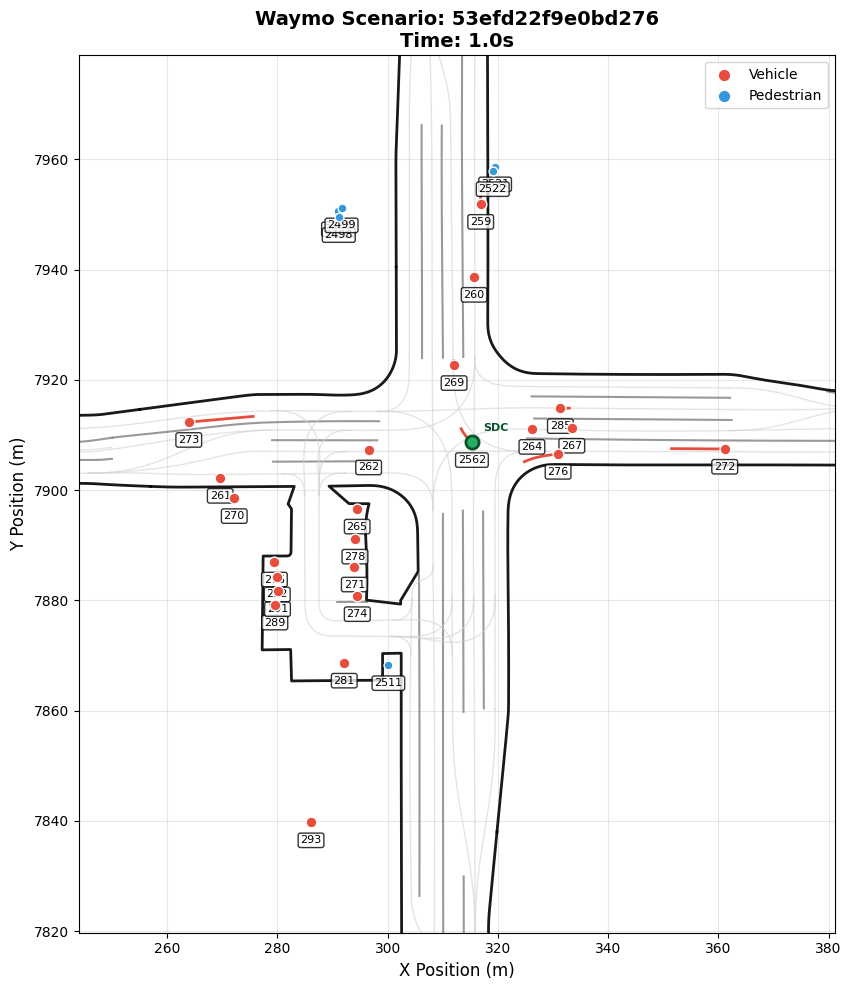

: 

: 

In [ ]:
# SCENARIO VISUALIZATION:
import matplotlib.pyplot as plt

def visualize_scenario(scenario, timestep=0, show_future=True, figsize=(12, 10), print_stats=False):
    """Visualize a Waymo scenario."""
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    colors = {1: '#e74c3c', 2: '#3498db', 3: '#f39c12', 4: '#9b59b6'}
    type_names = {1: 'Vehicle', 2: 'Pedestrian', 3: 'Cyclist', 4: 'Other'}

    print(f"VISUALIZING SCENARIO: {scenario.scenario_id}")
    print(f" Time: {scenario.timestamps_seconds[timestep]:.1f}s")
    
    render_map_features(scenario, ax)
    
    render_agents(scenario, timestep, colors, ax)
    
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X Position (m)', fontsize=12)
    ax.set_ylabel('Y Position (m)', fontsize=12)
    ax.set_title(f'Waymo Scenario: {scenario.scenario_id}\nTime: {scenario.timestamps_seconds[timestep]:.1f}s', 
                fontsize=14, fontweight='bold')
    all_x = [state.center_x for track in scenario.tracks for state in track.states if state.valid]  # Auto-scale with margin
    all_y = [state.center_y for track in scenario.tracks for state in track.states if state.valid]
    if all_x and all_y:
        margin = 20
        ax.set_xlim(min(all_x) - margin, max(all_x) + margin)
        ax.set_ylim(min(all_y) - margin, max(all_y) + margin)
    for obj_type, color in colors.items():
        if obj_type in [t.object_type for t in scenario.tracks]:
            ax.scatter([], [], c=color, s=50, label=type_names[obj_type])
    ax.legend()
    plt.tight_layout()        

    if print_stats:
        agent_counts = {}
        for track in scenario.tracks:
            
            if timestep < len(track.states) and track.states[timestep].valid:
                agent_type = type_names.get(track.object_type, 'Other')
                agent_counts[agent_type] = agent_counts.get(agent_type, 0) + 1
            
        for agent_type, count in agent_counts.items():
            print(f"   - {count} {agent_type}{'s' if count != 1 else ''}")
            
        print(f"   - Duration: {scenario.timestamps_seconds[-1] - scenario.timestamps_seconds[0]:.1f}s")
        print(f"   - Map features: {len(scenario.map_features)}")

    return fig, ax

time = 10    # in 0.1s
fig, ax = visualize_scenario(training_dataset[0][0], timestep=time, show_future=True, print_stats=True)

In [ ]:
def find_SDC(scenario, returnID):
    SDC_index = scenario.sdc_track_index
    agents = scenario.tracks
    if returnID:
        return agents[SDC_index].id
    else:
        return agents[SDC_index]

: 

: 

In [ ]:
def find_track_of_SDC(scenario, prinT=False):
    SDC_id = find_SDC(training_dataset[0][0], True)

    for track in training_dataset[0][0].tracks:
        if track.id == SDC_id:
            if prinT: print(track)
            return track

: 

: 

In [ ]:
# CONVERT SCENARIO TIMESTEP INTO PyG DATA (graph)
import torch
import numpy as np
from torch_geometric.data import Data, Batch

def initial_feature_vector(agent, stateIndex):

    # IMPLEMENT TECHNIQUES FROM FEATURE AUGMENTATION LECTURE (lec 7)

    object_types = {1: 'Vehicle', 2: 'Pedestrian', 3: 'Cyclist', 4: 'Other'}
    properties = [agent.states[stateIndex].center_x, agent.states[stateIndex].center_y, agent.states[stateIndex].velocity_x, agent.states[stateIndex].velocity_y, agent.states[stateIndex].valid]
    type_onehot = [1 if object_types[agent.object_type] == 'Vehicle' else 0,
                   1 if object_types[agent.object_type] == 'Pedestrian' else 0,
                   1 if object_types[agent.object_type] == 'Cyclist' else 0,
                   1 if object_types[agent.object_type] == 'Other' else 0 ]
    return torch.tensor(properties + type_onehot, dtype=torch.float32)

def build_edge_index_using_radius(position_tensor, radius, self_loops=False, valid_mask=None, min_distance=0.0):
    """Convert position tensor that holds (x,y) positions of agents into edge tensor (edge_index) OF SHAPE (2, E) for graph using radius."""
    pairwise_norm2_distances = torch.cdist(position_tensor, position_tensor)
    if valid_mask is not None:  # mask out pairs with invalid endpoints
        vm = torch.as_tensor(valid_mask, dtype=torch.bool, device=pairwise_norm2_distances.device)
        if vm.numel() != pairwise_norm2_distances.size(0):
            raise ValueError("valid_mask length must match number of positions")
        valid_pair = vm[:, None] & vm[None, :]   # True only if both endpoints valid
        pairwise_norm2_distances = pairwise_norm2_distances.clone()
        pairwise_norm2_distances[~valid_pair] = float('inf')
    if not self_loops:
        pairwise_norm2_distances.fill_diagonal_(float('inf'))
    edges_mask = (pairwise_norm2_distances <= float(radius)) & (pairwise_norm2_distances > float(min_distance))
    n1, n2 = torch.where(edges_mask)
    edge_index = torch.stack([n1, n2], dim=0)
    return edge_index

def build_edge_index_using_star_graph(position_tensor, scenario, agent_ids=None, valid_mask=None, min_distance=0.0):
    """Create star graph topology with SDC as center node. All other agents connect to SDC."""
    
    # Get SDC track using direct index access (O(1) instead of O(n) loop)
    sdc_track = scenario.tracks[scenario.sdc_track_index]
    sdc_id = sdc_track.id
    
    num_nodes = position_tensor.shape[0]
    
    # Find SDC's index in the position_tensor using agent_ids
    if agent_ids is not None:
        try:
            sdc_idx = agent_ids.index(sdc_id)
        except ValueError:
            print(f"Warning: SDC (id={sdc_id}) not found in agent_ids, using index 0")
            sdc_idx = 0
    else:
        # Fallback: use scenario.sdc_track_index (may be incorrect if agents are filtered)
        sdc_idx = scenario.sdc_track_index
        if sdc_idx >= num_nodes:
            print(f"Warning: SDC index {sdc_idx} >= num_nodes {num_nodes}, using index 0")
            sdc_idx = 0
    
    # Create valid mask tensor if provided
    if valid_mask is not None:
        vm = torch.as_tensor(valid_mask, dtype=torch.bool, device=position_tensor.device)
        if vm.numel() != num_nodes:
            raise ValueError("valid_mask length must match number of positions")
    else:
        vm = torch.ones(num_nodes, dtype=torch.bool, device=position_tensor.device)
    
    # Build star graph edges (bidirectional)
    edge_list = []
    for i in range(num_nodes):
        if i == sdc_idx:
            continue  # Skip self-loop to SDC
        
        if not vm[i]:  # Skip invalid agents
            continue
        
        # Check minimum distance if specified
        if min_distance > 0.0:
            dist = torch.norm(position_tensor[sdc_idx] - position_tensor[i])
            if dist <= min_distance:
                continue
        
        # Add bidirectional edges: SDC -> agent and agent -> SDC
        edge_list.append([sdc_idx, i])
        edge_list.append([i, sdc_idx])
    
    if len(edge_list) == 0:
        # Return empty edge_index with correct shape
        return torch.zeros((2, 0), dtype=torch.long, device=position_tensor.device)
    
    # Convert to edge_index format [2, num_edges]
    edge_index = torch.tensor(edge_list, dtype=torch.long, device=position_tensor.device).t()
    
    return edge_index


def get_data_from_agents(agents, node_features, positions_2D, agent_ids, valid_mask, timestep, use_valid_only):
    for agent in agents:
        if timestep >= len(agent.states):
            state = agent.states[-1]
        else:
            state = agent.states[timestep]

        valid = state.valid
        if use_valid_only and not valid:
            continue

        node_features.append(initial_feature_vector(agent, timestep))
        positions_2D.append([state.center_x, state.center_y])
        agent_ids.append(agent.id)
        valid_mask.append(1 if valid else 0)

def get_future_2D_trajectory_labels(scenario, agent_ids, initial_time, future_states):
    list_y = []
    id_to_agent = {t.id: t for t in scenario.tracks}
    for agent_id in agent_ids:
        agent = id_to_agent.get(agent_id)
        if agent is None:
            raise ValueError(f"Agent id {agent_id} not found in provided scenario.tracks")
        future_2d_positions = []
        for timestep in range(1, future_states+1):
            time = initial_time + timestep
            if time < len(agent.states) and agent.states[time].valid:
                future_2d_positions.append([agent.states[time].center_x, agent.states[time].center_y])
            else:
                # Pad with last known position
                last = agent.states[min(time, len(agent.states) - 1)]
                future_2d_positions.append([last.center_x, last.center_y])
        
        current_2d_position_t = torch.tensor([agent.states[initial_time].center_x, agent.states[initial_time].center_y], dtype=torch.float32)
        future_2d_positions_t = torch.tensor(future_2d_positions, dtype=torch.float32)

        future_2d_positions_in_offsets = future_2d_positions_t - current_2d_position_t
        list_y.append(future_2d_positions_in_offsets.flatten())
    return list_y

def scenario_to_pyg_data(scenario, timestep, radius, future_states=1, use_valid_only=True, method='radius'):
    """Converts scenarion into PyG data - graph."""
    node_features = []
    positions_2D = []
    agent_ids = []
    valid_mask = []
    get_data_from_agents(scenario.tracks, node_features, positions_2D, agent_ids, valid_mask, timestep, use_valid_only)

    if len(node_features) == 0:
        return None

    x = torch.stack(node_features)
    positions_2D_tensor = torch.tensor(positions_2D, dtype=torch.float32)

    if method == 'radius':
        edge_index = build_edge_index_using_radius(positions_2D_tensor, radius, valid_mask=valid_mask, min_distance=0.1)
    elif method == 'star':
        edge_index = build_edge_index_using_star_graph(positions_2D_tensor, scenario, agent_ids=agent_ids, valid_mask=valid_mask)

    y = torch.stack(get_future_2D_trajectory_labels(scenario, agent_ids, timestep, future_states))

    data = Data(x=x, edge_index=edge_index, pos=positions_2D_tensor, y=y)
    data.agent_ids = agent_ids
    data.valid_mask = torch.tensor(valid_mask, dtype=torch.bool)
    return data

: 

: 

In [ ]:
# VISUALIZE SCENARIO WITH GRAPH EDGES
import matplotlib.pyplot as plt

def show_distances(pos, src_idx, dst_idx, x_coords, y_coords):
    dist = np.sqrt((pos[src_idx, 0] - pos[dst_idx, 0])**2 + (pos[src_idx, 1] - pos[dst_idx, 1])**2)
    mid_x = (x_coords[0] + x_coords[1]) / 2
    mid_y = (y_coords[0] + y_coords[1]) / 2
    ax.annotate(f'{dist:.1f}m', xy=(mid_x, mid_y), fontsize=6, color='blue', ha='center', alpha=0.6)

def visualize_scenario_with_graph(scenario, timestep, radius, figsize=(14, 12), show_future=True, show_edge_distances=False, show_scenario_analysis=False):

    if show_scenario_analysis:
        analyze_scenario(scenario)
        analyze_scenario_agents(scenario)

    graph_data = scenario_to_pyg_data(scenario, timestep, radius, future_states=10, method='star')
    if graph_data is None:
        print("No valid agents at this timestep!")
        return None, None, None

    fig, ax = plt.subplots(1, 1, figsize=figsize)
    colors = {1: '#e74c3c', 2: '#3498db', 3: '#f39c12', 4: '#9b59b6'}
    type_names = {1: 'Vehicle', 2: 'Pedestrian', 3: 'Cyclist', 4: 'Other'}
    print(f"VISUALIZING SCENARIO WITH GRAPH: {scenario.scenario_id}")
    print(f" Time: {scenario.timestamps_seconds[timestep]:.1f}s")
    print(f" Graph: {graph_data.num_nodes} nodes, {graph_data.num_edges} edges")

    render_map_features(scenario, ax)

    print(f" Rendering {graph_data.num_edges} graph edges...")
    edge_index = graph_data.edge_index
    pos = graph_data.pos.numpy()
    for i in range(edge_index.shape[1]):
        src_idx = edge_index[0, i].item()
        dst_idx = edge_index[1, i].item()
        x_coords = [pos[src_idx, 0], pos[dst_idx, 0]]
        y_coords = [pos[src_idx, 1], pos[dst_idx, 1]]
        ax.plot(x_coords, y_coords, 'blue', linewidth=1.2, alpha=0.4, zorder=5)
        if show_edge_distances:
            show_distances()

    render_agents(scenario, timestep, colors, ax, show_future=show_future)

    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X Position (m)', fontsize=12)
    ax.set_ylabel('Y Position (m)', fontsize=12)
    ax.set_title(f'Waymo Scenario with Graph Edges (radius={radius}m)\n'
                f'Scenario: {scenario.scenario_id}, Time: {scenario.timestamps_seconds[timestep]:.1f}s\n'
                f'{graph_data.num_nodes} nodes, {graph_data.num_edges} edges', 
                fontsize=14, fontweight='bold')
    all_x = [state.center_x for track in scenario.tracks for state in track.states if state.valid]
    all_y = [state.center_y for track in scenario.tracks for state in track.states if state.valid]
    if all_x and all_y:
        margin = 20
        ax.set_xlim(min(all_x) - margin, max(all_x) + margin)
        ax.set_ylim(min(all_y) - margin, max(all_y) + margin)
    for obj_type, color in colors.items():
        if obj_type in [t.object_type for t in scenario.tracks]:
            ax.scatter([], [], c=color, s=50, label=type_names[obj_type])
    ax.plot([], [], 'blue', linewidth=2, alpha=0.4, label=f'Graph edges (≤{radius}m)')
    ax.legend()
    plt.tight_layout()

    agent_counts = {}
    for track in scenario.tracks:
        if timestep < len(track.states) and track.states[timestep].valid:
            agent_type = type_names.get(track.object_type, 'Other')
            agent_counts[agent_type] = agent_counts.get(agent_type, 0) + 1
    print(" Agents in graph:")
    for agent_type, count in agent_counts.items():
        print(f"   - {count} {agent_type}{'s' if count != 1 else ''}")
    if graph_data.num_edges > 0:
        avg_degree = graph_data.num_edges / graph_data.num_nodes
        print(f" Average degree: {avg_degree:.2f} edges per node")
    
    return fig, ax, graph_data

: 

: 

VISUALIZING SCENARIO WITH GRAPH: 53efd22f9e0bd276
 Time: 0.0s
 Graph: 28 nodes, 54 edges
 Rendering map features...
 Rendering 54 graph edges...
 Rendering agents...
 Agents in graph:
   - 23 Vehicles
   - 5 Pedestrians
 Average degree: 1.93 edges per node
 Agents in graph:
   - 23 Vehicles
   - 5 Pedestrians
 Average degree: 1.93 edges per node


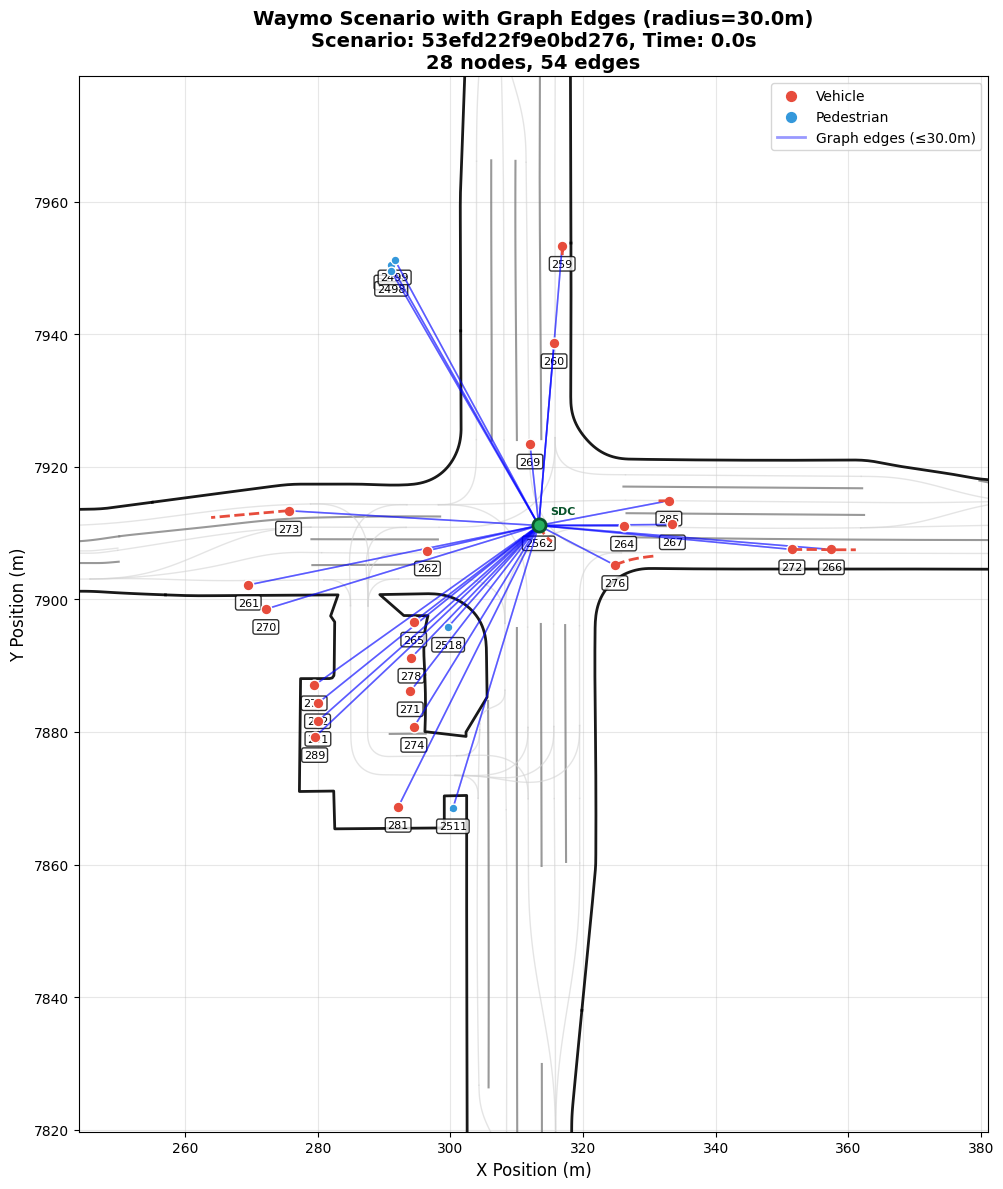

: 

: 

In [ ]:
# TEST: Visualize scenario with graph edges at different radii
time = 0
fig1, ax1, graph1 = visualize_scenario_with_graph(training_dataset[0][0], timestep=time, radius=30.0, show_future=True)


In [ ]:
# EvolveGCN IMPLEMENTATION FOR WAYMO TEMPORAL GRAPHS
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, Batch

def prepare_temporal_graph_data(scenario, start_time=0, end_time=10, radius=30.0):
    """Prepare temporal graph sequence from a Waymo scenario, returns list of PyG Data objects one per timestep"""
    temporal_graphs = []
    for t in range(start_time, min(end_time, len(scenario.timestamps_seconds))):
        graph_data = scenario_to_pyg_data(scenario, t, radius, future_states=1, use_valid_only=True)
        if graph_data is not None and graph_data.num_nodes > 0:
            temporal_graphs.append(graph_data)
        else:
            print(f"Warning: No valid graph at timestep {t}")
    return temporal_graphs

def train_evolvegcn(model, temporal_graphs, optimizer, loss_fn, device='cpu'):
    """Train EvolveGCN on a temporal sequence of graphs, returns average loss over the sequence."""
    model.train()
    
    num_graphs = len(temporal_graphs)
    if num_graphs == 0:
        return -1
    
    loss_accum = 0.0
    for t, graph in enumerate(temporal_graphs):
        graph = graph.to(device)
        
        out = model(graph.x, graph.edge_index)
        
        if hasattr(graph, 'y') and graph.y is not None:   # Compute loss (predict future positions)
            loss = loss_fn(out, graph.y)
            loss_accum += loss
            
    optimizer.zero_grad()
    loss_accum.backward()
    optimizer.step()
    
    return loss_accum / num_graphs

@torch.no_grad()
def evaluate_evolvegcn(model, temporal_graphs, device='cpu'):
    """Evaluate EvolveGCN on a temporal sequence, returns avg prediction error."""
    model.eval()
    model.reset_parameters()
    
    total_error = 0
    num_predictions = 0
    
    for graph in temporal_graphs:
        graph = graph.to(device)
        
        out = model(graph.x, graph.edge_index)

        print("out")
        print(out)
        
        if hasattr(graph, 'y') and graph.y is not None:
            error = F.mse_loss(out, graph.y, reduction='sum')
            total_error += error.item()
            num_predictions += graph.num_nodes
    
    return total_error / num_predictions if num_predictions > 0 else 0.0

: 

: 

In [ ]:
class EvolveGCNH(nn.Module):
    """EvolveGCN-H: Uses LSTM to evolve GCN weight matrices over time. Suitable for dynamic graphs where the graph structure changes over time."""
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2, dropout=0.5):
        super(EvolveGCNH, self).__init__()
        
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_layers = num_layers
        self.dropout = dropout
        
        self.gcn_layers = nn.ModuleList([GCNConv(input_dim, hidden_dim)] + [self.gcn_layers.append(GCNConv(hidden_dim, hidden_dim)) for i in range(num_layers - 2)] + [GCNConv(hidden_dim, output_dim)])
        
        # LSTM cells to evolve GCN weights for each layer:
        self.lstm_cells = nn.ModuleList()
        for gcn in self.gcn_layers:
            num_gcn_layer_params = sum(p.numel() for p in gcn.parameters())
            self.lstm_cells.append(nn.LSTMCell(num_gcn_layer_params, num_gcn_layer_params))
        
        # Initialize LSTM hidden states
        self.lstm_h = None
        self.lstm_c = None
        
    def reset_parameters(self):
        for gcn in self.gcn_layers:
            gcn.reset_parameters()
        for lstm in self.lstm_cells:
            lstm.reset_parameters()
        self.lstm_h = None
        self.lstm_c = None
    
    def _get_params_vector(self, gcn_layer):
        params = []
        for p in gcn_layer.parameters():
            params.append(p.view(-1))
        return torch.cat(params)
    
    def _set_params_from_vector(self, gcn_layer, params_vector):
        offset = 0
        for p in gcn_layer.parameters():
            numel = p.numel()
            p.data = params_vector[offset:offset + numel].view(p.shape)
            offset += numel
    
    def forward(self, x, edge_index):
        """Forward pass through EvolveGCN returns node embeddings [num_nodes, output_dim]"""
        if self.lstm_h is None:  # Initialize LSTM states if needed
            self.lstm_h = []
            self.lstm_c = []
            for lstm in self.lstm_cells:
                num_layer_params = list(lstm.parameters())[0].size(1)
                device = x.device
                self.lstm_h.append(torch.zeros(1, num_layer_params, device=device))
                self.lstm_c.append(torch.zeros(1, num_layer_params, device=device))
        
        # Evolve GCN weights using LSTM
        for i, (gcn, lstm) in enumerate(zip(self.gcn_layers, self.lstm_cells)):
            gcn_params_vector = self._get_params_vector(gcn).unsqueeze(0)   # [1, num_params]
            
            h_new, c_new = lstm(gcn_params_vector, (self.lstm_h[i], self.lstm_c[i]))   # Evolve parameters using LSTM
            
            self.lstm_h[i] = h_new  # Update LSTM states
            self.lstm_c[i] = c_new
            
            self._set_params_from_vector(gcn, h_new.squeeze(0))  # Set evolved parameters back to GCN layer
        
        # Forward pass through GCN layers
        for i, gcn in enumerate(self.gcn_layers):
            x = gcn(x, edge_index)
            
            # Apply activation and dropout (except for last layer)
            if i < len(self.gcn_layers) - 1:
                x = F.relu(x)
                x = F.dropout(x, p=self.dropout, training=self.training)
        
        return x


: 

: 

In [ ]:
# TRAIN THE EVOLVEGCN:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

scenario = training_dataset[0][0]
print(f"\nScenario: {scenario.scenario_id}")
print(f"Duration: {scenario.timestamps_seconds[-1] - scenario.timestamps_seconds[0]:.1f}s")
print(f"Number of timesteps: {len(scenario.timestamps_seconds)}")

print("\nPreparing temporal graphs...")
start_time = 0
end_time = 20  # Use first 20 timesteps (2 seconds)
radius = 30.0

temporal_graphs = prepare_temporal_graph_data(scenario, start_time, end_time, radius)
print(f"Created {len(temporal_graphs)} temporal graphs")


if len(temporal_graphs) > 0:
    input_dim = temporal_graphs[0].x.shape[1]  # Feature dimension
    hidden_dim = 64
    output_dim = temporal_graphs[0].y.shape[1] if hasattr(temporal_graphs[0], 'y') else 2
    
    print(f"\nModel configuration:")
    print(f"  Input dim: {input_dim}")
    print(f"  Hidden dim: {hidden_dim}")
    print(f"  Output dim: {output_dim}")
    
    model_h = EvolveGCNH(input_dim, hidden_dim, output_dim, num_layers=2, dropout=0.3).to(device)
    print(f"\nEvolveGCN-H parameters: {sum(p.numel() for p in model_h.parameters()):,}")
    
    # Training setup
    optimizer_h = torch.optim.Adam(model_h.parameters(), lr=0.001)
    loss_fn = nn.MSELoss()
    epochs = 10
    for epoch in range(epochs):
        model_h.reset_parameters()   # Reset LSTM states at the start of sequence
        loss_h = train_evolvegcn(model_h, temporal_graphs, optimizer_h, loss_fn, device)
        
        if epoch % 2 == 0:
            eval_error_h = evaluate_evolvegcn(model_h, temporal_graphs, device)
            print(f"Epoch {epoch:2d}: Loss={loss_h:.6f}, Eval MSE={eval_error_h:.6f}")
    

    # Final evaluation
    final_error_h = evaluate_evolvegcn(model_h, temporal_graphs, device)
    
    print(f"\nFinal Results:")
    print(f"  EvolveGCN-H MSE: {final_error_h:.6f}")
else:
    print("\nNo valid temporal graphs created. Try a different scenario or time range.")

Using device: cpu

Scenario: 53efd22f9e0bd276
Duration: 1.0s
Number of timesteps: 11

Preparing temporal graphs...
Created 11 temporal graphs

Model configuration:
  Input dim: 9
  Hidden dim: 64
  Output dim: 2

EvolveGCN-H parameters: 3,418,930
out
tensor([[-23.5901, -40.2010],
        [-28.4287, -48.3511],
        [-22.1799, -37.9312],
        [-27.1851, -46.3750],
        [-25.1479, -42.6286],
        [-26.8705, -45.9298],
        [-18.4917, -31.2003],
        [-24.2583, -41.0308],
        [-23.3900, -39.6716],
        [-24.1044, -41.2202],
        [-24.9732, -42.7002],
        [-21.7079, -36.6765],
        [-20.1692, -34.4837],
        [-24.0742, -41.1564],
        [-25.8250, -44.1618],
        [-24.1882, -41.0081],
        [-26.8705, -45.9298],
        [-22.0715, -37.7317],
        [-26.0971, -44.1773],
        [-23.9769, -41.0012],
        [-23.9769, -41.0012],
        [-25.8250, -44.1618],
        [-23.5901, -40.2010],
        [-21.0726, -35.9060],
        [-21.0731, -35.9065],

: 

: 

Plotting lane polylines for scenario: 53efd22f9e0bd276
Total lanes plotted: 103
  - SURFACE_STREET: 103
Total lanes plotted: 103
  - SURFACE_STREET: 103


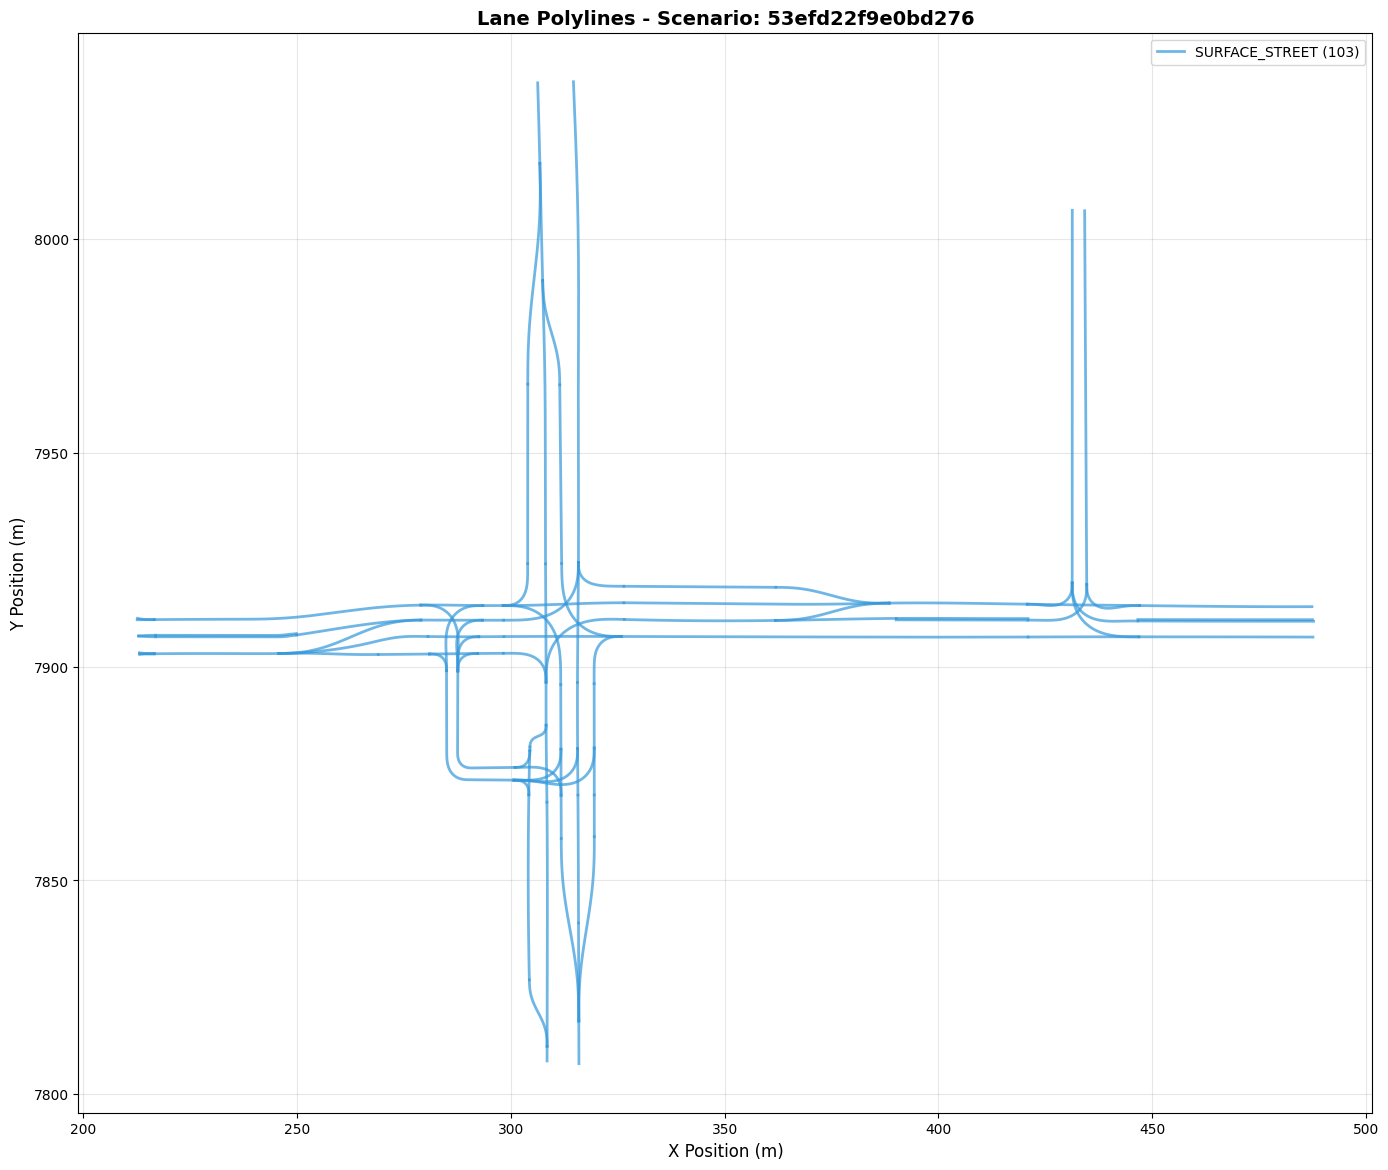

In [ ]:
import matplotlib.pyplot as plt

def plot_lane_polylines(scenario, figsize=(14, 12), show_lane_ids=False, show_lane_types=True):
    """
    Plot only lane polylines from a Waymo scenario.
    
    Args:
        scenario: Waymo scenario object
        figsize: Figure size tuple (width, height)
        show_lane_ids: Whether to show lane IDs on the plot
        show_lane_types: Whether to color-code lanes by type
    
    Returns:
        fig, ax: Matplotlib figure and axes objects
    """
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Lane type names and colors
    lane_type_names = {
        0: 'UNDEFINED',
        1: 'FREEWAY',
        2: 'SURFACE_STREET',
        3: 'BIKE_LANE'
    }
    
    lane_type_colors = {
        0: '#95a5a6',  # Gray for undefined
        1: '#e74c3c',  # Red for freeway
        2: '#3498db',  # Blue for surface street
        3: '#2ecc71'   # Green for bike lane
    }
    
    lane_counts = {0: 0, 1: 0, 2: 0, 3: 0}
    
    print(f"Plotting lane polylines for scenario: {scenario.scenario_id}")
    
    # Plot lane polylines
    for feature in scenario.map_features:
        feature_type = feature.WhichOneof('feature_data')
        
        if feature_type == 'lane' and hasattr(feature.lane, 'polyline'):
            lane_type = feature.lane.type
            lane_counts[lane_type] += 1
            
            # Extract coordinates
            x_coords = [point.x for point in feature.lane.polyline]
            y_coords = [point.y for point in feature.lane.polyline]
            
            # Choose color
            if show_lane_types:
                color = lane_type_colors.get(lane_type, '#95a5a6')
            else:
                color = '#3498db'  # Default blue
            
            # Plot the lane
            ax.plot(x_coords, y_coords, color=color, linewidth=2, alpha=0.7)
            
            # Optionally show lane ID at the midpoint
            if show_lane_ids and len(x_coords) > 0:
                mid_idx = len(x_coords) // 2
                ax.annotate(
                    str(feature.id),
                    xy=(x_coords[mid_idx], y_coords[mid_idx]),
                    fontsize=8,
                    ha='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
                )
    
    # Configure plot
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X Position (m)', fontsize=12)
    ax.set_ylabel('Y Position (m)', fontsize=12)
    ax.set_title(f'Lane Polylines - Scenario: {scenario.scenario_id}', 
                 fontsize=14, fontweight='bold')
    
    # Create legend if showing lane types
    if show_lane_types:
        for lane_type, count in lane_counts.items():
            if count > 0:
                type_name = lane_type_names.get(lane_type, f'Type_{lane_type}')
                color = lane_type_colors.get(lane_type, '#95a5a6')
                ax.plot([], [], color=color, linewidth=2, alpha=0.7, 
                       label=f'{type_name} ({count})')
        ax.legend(loc='upper right')
    
    plt.tight_layout()
    
    # Print summary
    total_lanes = sum(lane_counts.values())
    print(f"Total lanes plotted: {total_lanes}")
    for lane_type, count in lane_counts.items():
        if count > 0:
            type_name = lane_type_names.get(lane_type, f'Type_{lane_type}')
            print(f"  - {type_name}: {count}")
    
    return fig, ax


# Example usage:
fig, ax = plot_lane_polylines(
    training_dataset[0][0],
    figsize=(14, 12),
    show_lane_ids=False,
    show_lane_types=True
)